# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بلور کردن صورت در عکس و فیلم</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نصب پیش‌نیازهای اولیه، با اجرای دستور زیر، کتابخانه‌های مورد نیاز نصب می‌شوند:</div>

In [ ]:
!pip install opencv-python==4.6.0.66
!pip install matplotlib
!pip install numpy

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> با اجرای دستور زیر، کتابخانه‌های مورد نیاز import می‌شوند:</div>

In [23]:
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مدل شبکه عصبی برای تشخیص صورت که در پوشه‌ی models قرار دارد، بارگذاری می‌شود، ورودی چهارم این تابع، دقت تشخیص صورت را مشخص می‌کند که مقداری بین 0 و 1 است (هر چه به 1 نزدیکتر باشد، تشخیص صورت سختگیرانه‌تر است):</div>

In [24]:
## [initialize_FaceDetectorYN]
detector = cv.FaceDetectorYN.create(
    "model/face/face_detection_yunet_2022mar.onnx",
    "",
    (320, 320),
    0.5,
    0.3,
    5000
)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص و مات کردن صورت در تصاویر:</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آدرس تصویر مورد نظر و همچنین آدرسی که در انتها تصویر جدید ذخیره می‌شود را وارد کنید و کدهای زیر را اجرا کنید:</div>

In [25]:
source_image_path = "./images/human.jpeg"
result_image_path = "./images/result.jpeg"

img = cv.imread(source_image_path)

height, width, _ = img.shape ## the shape of image

detector.setInputSize((width, height))

result = detector.detect(img)

True

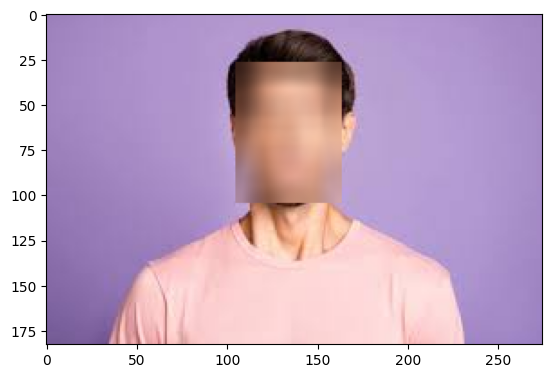

In [26]:
thickness=2
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        a, b, c, d = coords[1], coords[1] + coords[3], coords[0], coords[0] + coords[2]
        blur_area = img[a:b , c:d]
        blur_face = cv.blur(blur_area, (21, 21))
        img[a:b, c:d] = blur_face
        ## uncomment the below line to show the rectangles that show the face areas:
        # cv.rectangle(img, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
      
plt.imshow(img[...,::-1])
cv.imwrite(result_image_path, img)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص و مات کردن صورت در ویدیوها:</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آدرس ویدیو مورد نظر و همچنین آدرسی که در انتها تصویر جدید ذخیره می‌شود را وارد کنید و کدهای زیر را اجرا کنید:</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma; font-weight: bold">متاسفانه صدای ویدیو بعد از اعمال تغییرات حذف می‌شود.</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma; font-weight: bold">برای استفاده از وبکم به عنوان منبع ویدیو، آدرس ویدیو را برابر با عدد 0 قرار دهید.</div>

In [21]:
source_video_path = './videos/sample.mp4' ## put 0 for webcam.
result_video_path = './videos/result.avi'

cap = cv.VideoCapture(source_video_path)

# Get the height and width of the frame (required to be an interger)
width = int(cap.get(3))
height = int(cap.get(4))

detector.setInputSize((width, height))

# Define the codec and create VideoWriter object. The output is stored in '*.avi' file.
out = cv.VideoWriter(result_video_path, cv.VideoWriter_fourcc('M','J','P','G'), cap.get(cv.CAP_PROP_FPS), (width, height), True)


while True:
    ret, frame = cap.read()
    if not ret: 
        print("Exiting ...")
        break
    frame = cv.flip(frame, 1)
    result = detector.detect(frame)
    thickness=2
    if result[1] is not None:
        for idx, face in enumerate(result[1]):
            coords = face[:-1].astype(np.int32)
            a, b, c, d = max(coords[1], 0) , coords[1] + coords[3], max(0, coords[0]), coords[0] + coords[2]
            if a < 0 or b < 0 or c < 0 or d < 0:
                print(a, b, c, d)
                break
            blur_area = frame[a:b , c:d]
            blur_face = cv.blur(blur_area, (21, 21))
            frame[a:b, c:d] = blur_face
            ## uncomment the below line to show the rectangles that show the face areas:
            # cv.rectangle(frame, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)

    out.write(frame)
    cv.imshow('Webcam', frame)
    if cv.waitKey(1) & 0xFF == 27: ## press esc to quit. 
        break
        
# Release camera and close windows
cap.release()
out.release()
cv.destroyAllWindows()      

Exiting ...
